# 1. Problem Information
- **Name:** [**Equipment State Classification**](https://platform.olimpiada-ai.ro/en/problems/77)
- **Date:** 12/02/2026
- **Type:** Clustering 

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 3. Data preparation

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
print(train.shape)
train.head(5)

(400, 5)


,SampleID,Feature1,Feature2,Feature3,Feature4
0,50,1.286770,5.397545,-8.497000,10.007335
1,99,6.849422,-4.604580,-7.379322,-6.270230
2,422,-1.989851,10.547025,4.531119,2.374881
3,413,-5.678413,-7.288185,-10.876452,6.315437
4,186,4.341630,4.554769,-9.396261,9.089081


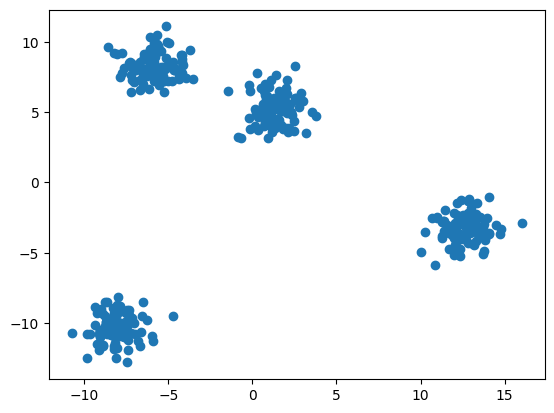

In [3]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(train.iloc[:,1:])
plt.scatter(X_pca[:,0],X_pca[:,1])

# 4. Models

In [4]:
model = KMeans(n_clusters=4,random_state=0,n_init=50)
model.fit(X_pca)
prediction = model.predict(pca.transform(test.iloc[:,1:]))

# 5. Submission

In [5]:
submission = pd.DataFrame({
    "SampleID": test['SampleID'],
    "Label": prediction,
})
submission.head()

,SampleID,Label
0,66,1
1,217,3
2,364,3
3,41,0
4,296,0


In [6]:
submission.to_csv("submission.csv", index=False)